# Global Health Outcomes: Analysis of life Expectancy Indicators

Jean-Paul Ventura

7/31/2020

Notes: Please refer [here](https://github.com/jvntra/nyc-mhtn-ds-062220-lectures/tree/master/dataproj_m2/who_life_expectancy) for more expansive commit history.

In [72]:
# Import standard analytics libraries. 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Import statistical learning libraries.
from scipy import stats as scs
from scipy.stats.mstats import winsorize
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 300)

In [73]:
# Load dataset

df = pd.read_csv('./who_LifeExpectancyData.csv')

In [74]:
# Inspect data column headers.
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [75]:
# Inspect data types and data frame shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [76]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [77]:
# Create dictionary of column name replacements for mapping to update column headers.

rnm_dict = {}
for i in df.columns:
    rnm_dict[i] = i.strip().lower().replace(' ','_').replace('-','_').strip('_')

rnm_dict[' thinness  1-19 years']  = 'thinness_1_9_years' 

rnm_dict[' HIV/AIDS'] = 'hiv_aids'

rnm_dict

{'Country': 'country',
 'Year': 'year',
 'Status': 'status',
 'Life expectancy ': 'life_expectancy',
 'Adult Mortality': 'adult_mortality',
 'infant deaths': 'infant_deaths',
 'Alcohol': 'alcohol',
 'percentage expenditure': 'percentage_expenditure',
 'Hepatitis B': 'hepatitis_b',
 'Measles ': 'measles',
 ' BMI ': 'bmi',
 'under-five deaths ': 'under_five_deaths',
 'Polio': 'polio',
 'Total expenditure': 'total_expenditure',
 'Diphtheria ': 'diphtheria',
 ' HIV/AIDS': 'hiv_aids',
 'GDP': 'gdp',
 'Population': 'population',
 ' thinness  1-19 years': 'thinness_1_9_years',
 ' thinness 5-9 years': 'thinness_5_9_years',
 'Income composition of resources': 'income_composition_of_resources',
 'Schooling': 'schooling'}

In [78]:
# Map replacement header strings to old column headers and display new column headers.

df.rename(columns = rnm_dict, inplace=True)
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under_five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv_aids', 'gdp', 'population', 'thinness_1_9_years',
       'thinness_5_9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

In [79]:
# Inspect completeness of data by investigating number of entries for country-year.
df.country.value_counts()

Cabo Verde               16
Czechia                  16
Montenegro               16
Sao Tome and Principe    16
Egypt                    16
                         ..
Niue                      1
Nauru                     1
San Marino                1
Saint Kitts and Nevis     1
Cook Islands              1
Name: country, Length: 193, dtype: int64

In [80]:
# It appears smaller countries are missing data, here they are identified.

for i in df.country.unique():
    if len(df[df.country == i]) == 1:
        print(i)

Cook Islands
Dominica
Marshall Islands
Monaco
Nauru
Niue
Palau
Saint Kitts and Nevis
San Marino
Tuvalu


In [81]:
# Inspect missing values in each column.

df.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under_five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv_aids                             0
gdp                                448
population                         652
thinness_1_9_years                  34
thinness_5_9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

In [82]:
# It can be seen above that 10 values are missing for two fields... these are likely those smaller countries.

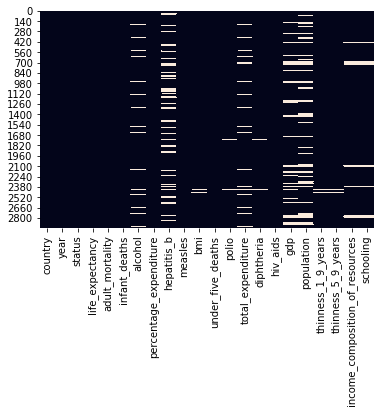

In [83]:
# Observe how much data is missing generally.

sns.heatmap(df.isnull(), cbar=False)

In [86]:

# Create header iterables for interpolation process

country_list = df.country.unique()
fill_list = ['life_expectancy','adult_mortality','alcohol',
             'hepatitis_b','bmi','polio','total_expenditure','diphtheria','gdp',
             'population','thinness_1_9_years','thinness_5_9_years',
             'income_composition_of_resources','schooling']

# Impute null values by interpolation.

for country in country_list:
    df.loc[df['country'] == country,fill_list] = df.loc[df['country'] == country,fill_list].interpolate()

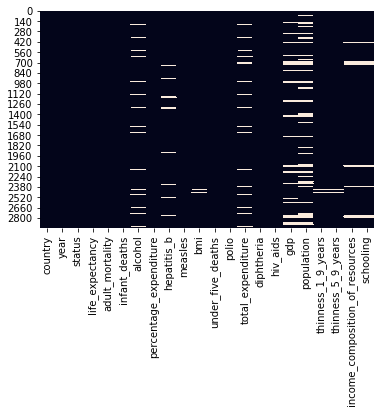

In [87]:
# Observe heatmap to re-inspect for missing/null values.

sns.heatmap(df.isnull(), cbar=False)

In [88]:
# Inspect column-wise percentage of null values after interpolation.
df.isnull().mean()

country                            0.000000
year                               0.000000
status                             0.000000
life_expectancy                    0.003404
adult_mortality                    0.003404
infant_deaths                      0.000000
alcohol                            0.065691
percentage_expenditure             0.000000
hepatitis_b                        0.049013
measles                            0.000000
bmi                                0.011572
under_five_deaths                  0.000000
polio                              0.000000
total_expenditure                  0.071818
diphtheria                         0.000000
hiv_aids                           0.000000
gdp                                0.143635
population                         0.221920
thinness_1_9_years                 0.011572
thinness_5_9_years                 0.011572
income_composition_of_resources    0.056841
schooling                          0.055480
dtype: float64

In [89]:
# Drop abundance of null values.

df.dropna(inplace=True)

In [90]:
# Inspect null summary.

df.isnull().sum()

country                            0
year                               0
status                             0
life_expectancy                    0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
percentage_expenditure             0
hepatitis_b                        0
measles                            0
bmi                                0
under_five_deaths                  0
polio                              0
total_expenditure                  0
diphtheria                         0
hiv_aids                           0
gdp                                0
population                         0
thinness_1_9_years                 0
thinness_5_9_years                 0
income_composition_of_resources    0
schooling                          0
dtype: int64

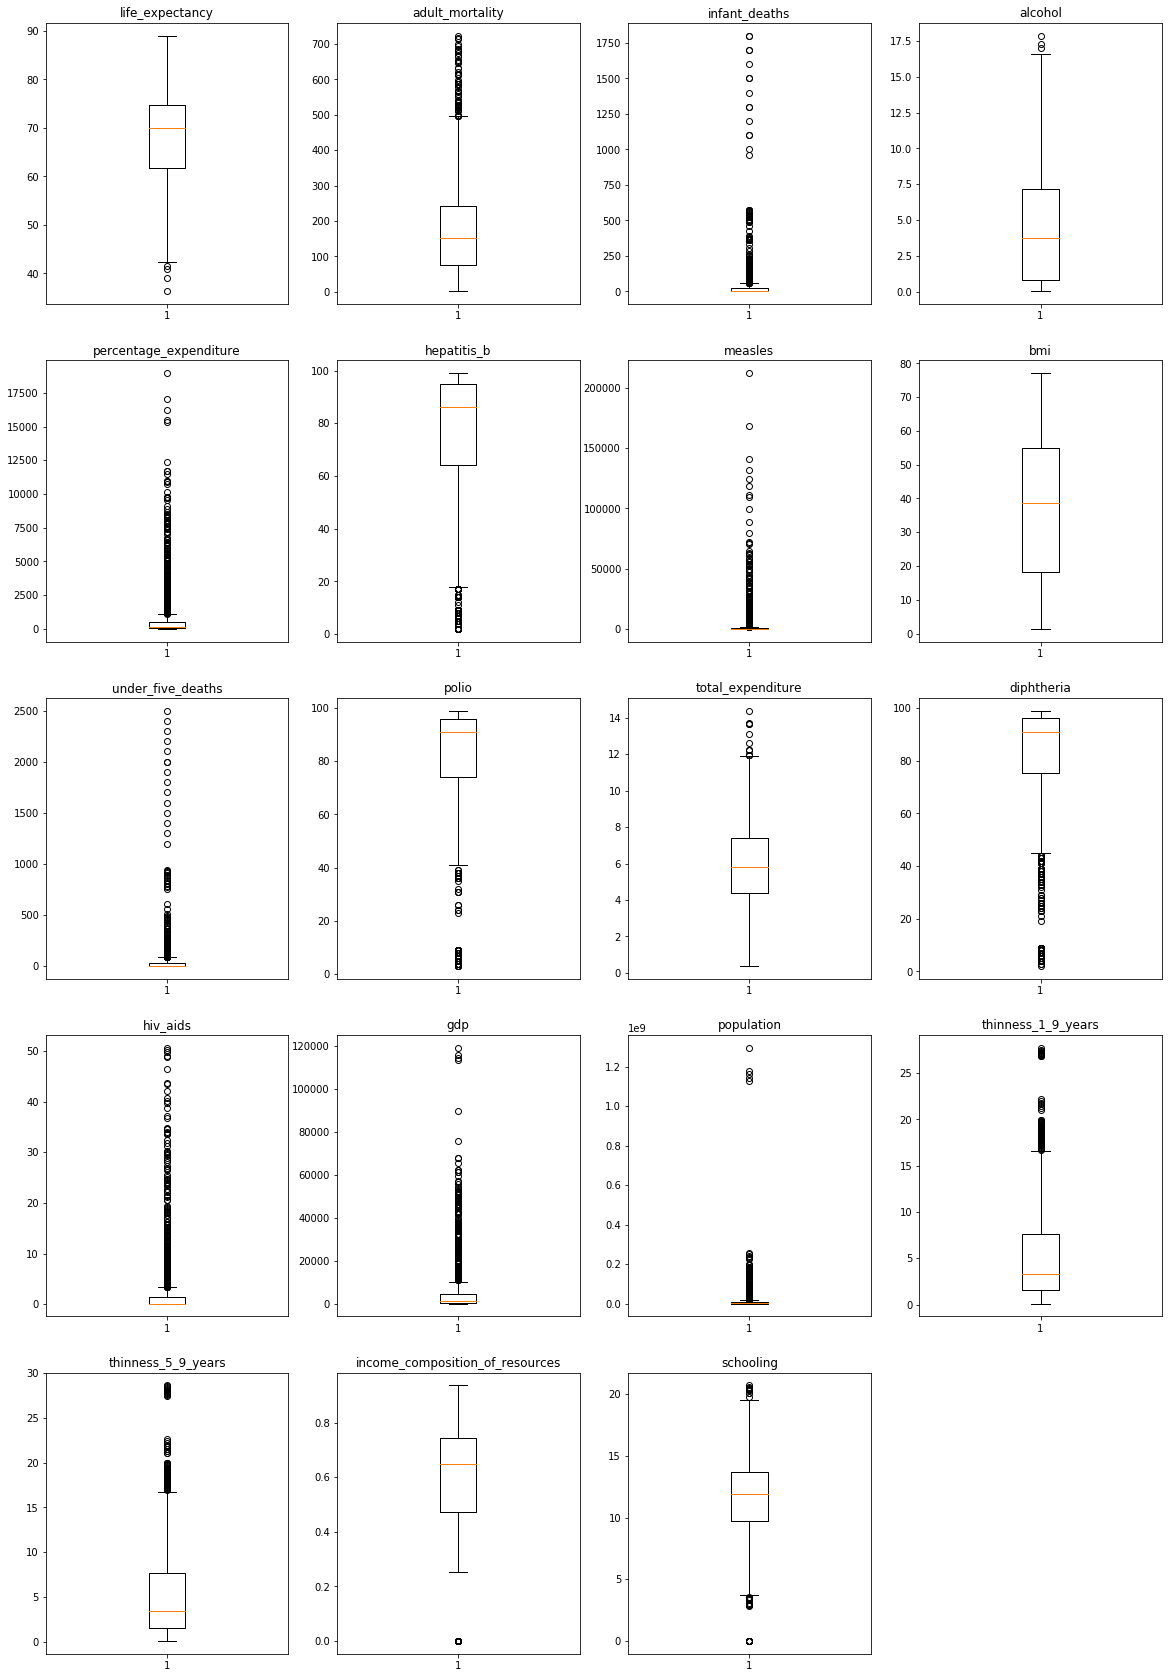

In [92]:
# display boxplots of numerical variables for outlier inspection.

# Create dictionary of column names and indices as iterable for box-plot display.

col_dict = {'life_expectancy':1, 'adult_mortality':2,
            'infant_deaths':3, 'alcohol':4,
            'percentage_expenditure':5, 'hepatitis_b':6,
            'measles':7, 'bmi':8,
            'under_five_deaths':9, 'polio':10,
            'total_expenditure':11,'diphtheria':12,
            'hiv_aids':13, 'gdp':14,
            'population':15, 'thinness_1_9_years':16,
            'thinness_5_9_years':17, 'income_composition_of_resources':18,
            'schooling':19}


# Display boxplots for numerical variables for outlier inspection.

plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.title(variable)

In [93]:
# Calculate number of outliers in each variable and their percentage using Tukey's method (trimming).

for variable in col_dict.keys():
    q75, q25 = np.percentile(df[variable], [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers, percentage in column '{}' : {} and {}".format(variable,
                                                                             len((np.where((df[variable] > max_val) | 
                                                                                           (df[variable] < min_val))[0])),len((np.where((df[variable] > max_val) | 
                                                                                           (df[variable] < min_val))[0]))*100/1987))

Number of outliers, percentage in column 'life_expectancy' : 4 and 0.20130850528434827
Number of outliers, percentage in column 'adult_mortality' : 58 and 2.9189733266230498
Number of outliers, percentage in column 'infant_deaths' : 198 and 9.96477101157524
Number of outliers, percentage in column 'alcohol' : 3 and 0.1509813789632612
Number of outliers, percentage in column 'percentage_expenditure' : 232 and 11.675893306492199
Number of outliers, percentage in column 'hepatitis_b' : 216 and 10.870659285354806
Number of outliers, percentage in column 'measles' : 361 and 18.16809260191243
Number of outliers, percentage in column 'bmi' : 0 and 0.0
Number of outliers, percentage in column 'under_five_deaths' : 227 and 11.424257674886764
Number of outliers, percentage in column 'polio' : 159 and 8.002013085052843
Number of outliers, percentage in column 'total_expenditure' : 13 and 0.6542526421741318
Number of outliers, percentage in column 'diphtheria' : 195 and 9.813789632611979
Number of

In [96]:
# Try baseline model after data cleaning.

lr_bl0_model = ols(formula='life_expectancy~adult_mortality+infant_deaths+alcohol+percentage_expenditure+hepatitis_b\
+measles+bmi+under_five_deaths+polio+total_expenditure+diphtheria+hiv_aids+gdp+population+\
thinness_1_9_years+thinness_5_9_years+income_composition_of_resources+schooling', data=df).fit()

In [97]:
# Output model summary.

lr_bl0_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     545.8
Date:                Fri, 31 Jul 2020   Prob (F-statistic):               0.00
Time:                        15:03:11   Log-Likelihood:                -5556.1
No. Observations:                1987   AIC:                         1.115e+04
Df Residuals:                    1968   BIC:                         1.126e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          51.7423      0.620     83.483      0.000      50.527      52.958
adult_mortality                    -0.0154      0.001    -17.480      0.000      -0.017      -0.014
infant_deaths                       0.0897      0.009     10.078      0.000       0.072       0.107
alcohol                            -0.0793      0.031     -2.583      0.010      -0.139      -0.019
percentage_expenditure              0.0004      0.000      1.860      0.063   -1.93e-05       0.001
hepatitis_b                        -0.0030      0.004     -0.789      0.430      -0.011       0.004
measles                         -4.445e-06   8.79e-06     -0.506      0.613   -2.17e-05    1.28e-05
bmi                                 0.0584      0.006      9.254      0.000       0.046       0.071
under_five_deaths                  -0.0664      0.007    -10.185      0.000      -0.079      -0.054
polio                               0.0128      0.005      2.476      0.013       0.003       0.023
total_expenditure                   0.0729      0.042      1.741      0.082      -0.009       0.155
diphtheria                          0.0211      0.006      3.757      0.000       0.010       0.032
hiv_aids                           -0.4746      0.018    -26.384      0.000      -0.510      -0.439
gdp                               1.92e-05      3e-05      0.640      0.522   -3.97e-05    7.81e-05
population                      -1.776e-09    1.7e-09     -1.044      0.297   -5.11e-09    1.56e-09
thinness_1_9_years                 -0.0512      0.051     -0.997      0.319      -0.152       0.049
thinness_5_9_years                  0.0101      0.051      0.200      0.842      -0.089       0.109
income_composition_of_resources     8.2810      0.778     10.646      0.000       6.755       9.807
schooling                           0.8869      0.054     16.355      0.000       0.781       0.993
==============================================================================
Omnibus:                      124.494   Durbin-Watson:                   0.695
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              536.455
Skew:                          -0.063   Prob(JB):                    3.24e-117
Kurtosis:                       5.542   Cond. No.                     5.85e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.85e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [120]:
# Will use the winsorization method of replacing extreme values with those of the 95th percentile. This will mask
# the entries with a lot of missing years. the trade off is not taking into account a subsample of developing countries.

winsorized_life_expectancy = winsorize(df['life_expectancy'],(0.01,0))
winsorized_adult_mortality = winsorize(df['adult_mortality'],(0,0.03))
winsorized_infant_deaths = winsorize(df['infant_deaths'],(0,0.10))
winsorized_alcohol = winsorize(df['alcohol'],(0,0.01))
winsorized_percentage_expenditure = winsorize(df['percentage_expenditure'],(0,0.12))
winsorized_hepatitis_b = winsorize(df['hepatitis_b'],(0.11,0))
winsorized_measles = winsorize(df['measles'],(0,0.19))
winsorized_under_five_deaths = winsorize(df['under_five_deaths'],(0,0.12))
winsorized_polio = winsorize(df['polio'],(0.09,0))
winsorized_total_expenditure = winsorize(df['total_expenditure'],(0,0.01))
winsorized_diphtheria = winsorize(df['diphtheria'],(0.10,0))
winsorized_hiv_aids = winsorize(df['hiv_aids'],(0,0.16))
winsorized_gdp = winsorize(df['gdp'],(0,0.13))
winsorized_population = winsorize(df['population'],(0,0.14))
winsorized_thinness_1_9_years = winsorize(df['thinness_1_9_years'],(0,0.04))
winsorized_thinness_5_9_years = winsorize(df['thinness_5_9_years'],(0,0.04))
winsorized_income_comp_of_resources = winsorize(df['income_composition_of_resources'],(0.05,0))
winsorized_schooling = winsorize(df['schooling'],(0.02,0.01))


Text(0.5, 1.0, 'winsorized_Adult_Mortality')

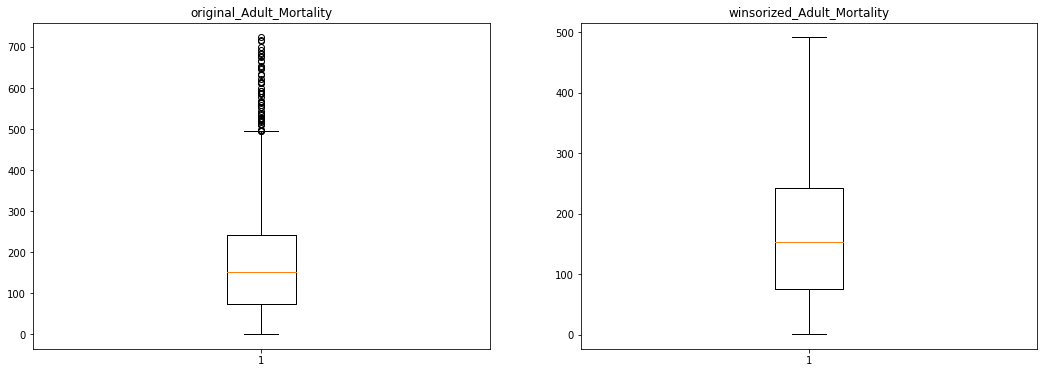

In [121]:
#inspect the effect of winsorization for a couple of explantory vars.

plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.boxplot(df.adult_mortality)
plt.title("original_Adult_Mortality")

plt.subplot(1,2,2)
plt.boxplot(winsorized_adult_mortality)
plt.title("winsorized_Adult_Mortality")

Text(0.5, 1.0, 'winsorized_Infant_Deaths')

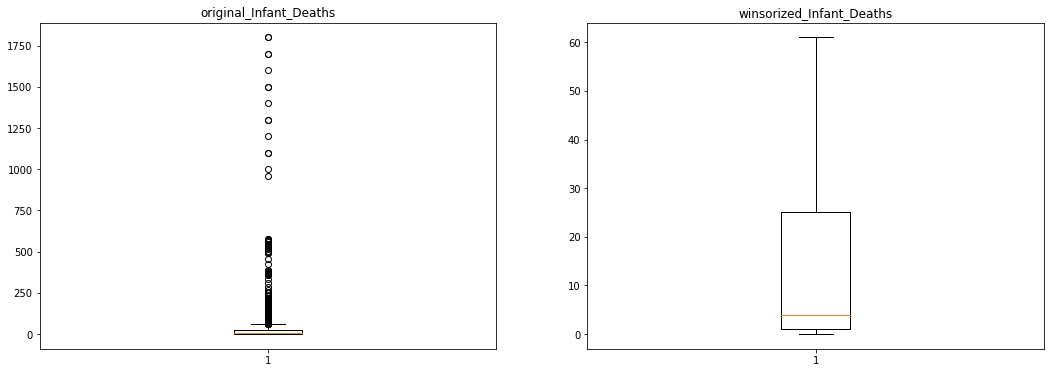

In [122]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.boxplot(df.infant_deaths)
plt.title("original_Infant_Deaths")

plt.subplot(1,2,2)
plt.boxplot(winsorized_infant_deaths)
plt.title("winsorized_Infant_Deaths")

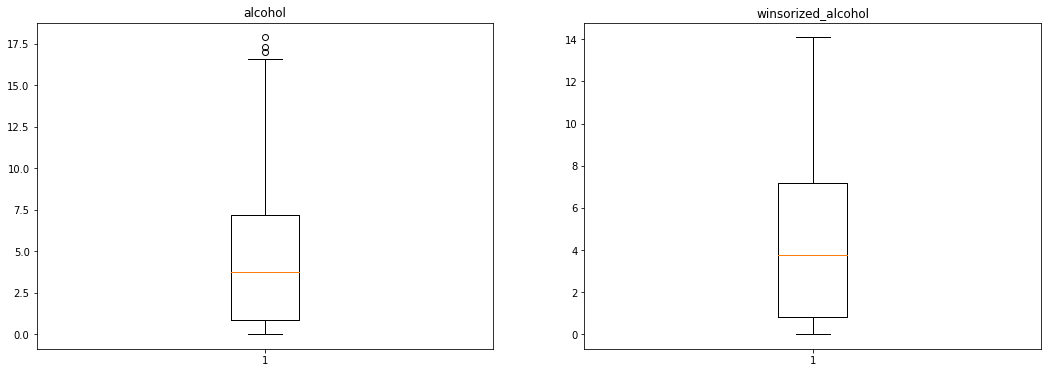

In [123]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.boxplot(df.alcohol)
plt.title("alcohol")

plt.subplot(1,2,2)
plt.boxplot(winsorized_alcohol)
plt.title("winsorized_alcohol")

plt.show()

In [124]:
# Check number of Outliers after Winsorization for each variable.
win_list = [winsorized_life_expectancy,winsorized_adult_mortality,winsorized_infant_deaths,winsorized_alcohol,
            winsorized_percentage_expenditure,winsorized_hepatitis_b,winsorized_measles,winsorized_under_five_deaths,winsorized_polio,winsorized_total_expenditure,
            winsorized_diphtheria,winsorized_hiv_aids,winsorized_gdp,winsorized_population,winsorized_thinness_1_9_years,
            winsorized_thinness_5_9_years,winsorized_income_comp_of_resources,winsorized_schooling]

for variable in win_list:
    q75, q25 = np.percentile(variable, [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    print("Number of outliers after winsorization : {}".format(len(np.where((variable > max_val) | (variable < min_val))[0])))

Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0


In [125]:
df_w = pd.DataFrame()
df_w['country'] = df.country
df_w['year'] = df.year
df_w['status'] = df.status
df_w['life_expectancy'] = winsorized_life_expectancy
df_w['adult_mortality'] = winsorized_adult_mortality
df_w['infant_deaths'] = winsorized_infant_deaths
df_w['alcohol'] = winsorized_alcohol
df_w['percentage_expenditure'] = winsorized_percentage_expenditure
df_w['hepatitis_b'] = winsorized_hepatitis_b
df_w['measles'] = winsorized_measles
df_w['bmi'] = df.bmi
df_w['under_five_deaths'] = winsorized_under_five_deaths
df_w['polio'] = winsorized_polio
df_w['total_expenditure'] = winsorized_total_expenditure
df_w['diphtheria'] = winsorized_diphtheria
df_w['hiv_aids'] = winsorized_hiv_aids
df_w['gdp'] = winsorized_gdp
df_w['population'] = winsorized_population
df_w['thinness_1_9_years'] = winsorized_thinness_1_9_years
df_w['thinness_5_9_years'] = winsorized_thinness_5_9_years
df_w['income_comp_of_resources'] = winsorized_income_comp_of_resources
df_w['schooling'] = winsorized_schooling

In [126]:
# Summarize descriptive stats of trimmed data.

df_w.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1_9_years,thinness_5_9_years,income_comp_of_resources,schooling
count,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000
mean,2006.984902,68.000956,172.334172,15.502265,4.443566,306.331272,74.977353,304.742828,36.428636,21.738299,82.957725,5.895471,83.225969,0.874082,2864.719760,4.799769e+06,4.955561,5.024006,0.616143,11.658581
std,4.323147,9.656676,122.914052,20.877993,3.943939,379.046366,26.527285,456.738004,19.736138,29.994594,17.556131,2.266421,17.239348,1.183198,3186.069874,6.217060e+06,4.187776,4.265385,0.174584,3.102260
min,2000.000000,45.100000,1.000000,0.000000,0.010000,0.000000,18.000000,0.000000,1.400000,0.000000,44.000000,0.370000,45.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.276000,4.500000
25%,2003.000000,61.700000,75.000000,1.000000,0.830000,29.469887,64.000000,0.000000,18.150000,1.000000,74.000000,4.360000,75.500000,0.100000,384.553107,1.967480e+05,1.600000,1.600000,0.473000,9.700000
50%,2007.000000,69.900000,153.000000,4.000000,3.770000,104.314473,86.000000,20.000000,38.700000,4.000000,91.000000,5.800000,91.000000,0.100000,1334.651896,1.396861e+06,3.300000,3.400000,0.648000,11.900000
75%,2011.000000,74.700000,243.000000,25.000000,7.190000,470.870122,95.000000,499.500000,55.000000,36.000000,96.000000,7.385000,96.000000,1.400000,4441.530655,7.625918e+06,7.600000,7.700000,0.745000,13.700000
max,2015.000000,89.000000,491.000000,61.000000,14.090000,1111.191325,99.000000,1154.000000,77.100000,85.000000,99.000000,11.700000,99.000000,3.200000,9291.227619,1.699335e+07,15.700000,16.300000,0.936000,18.600000


In [127]:
# Summarize descriptive statistics of categorical variables.

df_w.describe(include=['O'])

,country,status
count,1987,1987
unique,133,2
top,Albania,Developing
freq,16,1702


In [128]:
# Inspect feature behavior with target -> Compile list of numerical features

feat = list(df_w.columns)
del feat[0:3]
feat

['life_expectancy',
 'adult_mortality',
 'infant_deaths',
 'alcohol',
 'percentage_expenditure',
 'hepatitis_b',
 'measles',
 'bmi',
 'under_five_deaths',
 'polio',
 'total_expenditure',
 'diphtheria',
 'hiv_aids',
 'gdp',
 'population',
 'thinness_1_9_years',
 'thinness_5_9_years',
 'income_comp_of_resources',
 'schooling']

In [129]:
# Construct subplot row groups for easier bulk-plotting
n = 4
row_groups= [feat[i:i+n] for i in range(0, len(feat), n) ]
row_groups

[['life_expectancy', 'adult_mortality', 'infant_deaths', 'alcohol'],
 ['percentage_expenditure', 'hepatitis_b', 'measles', 'bmi'],
 ['under_five_deaths', 'polio', 'total_expenditure', 'diphtheria'],
 ['hiv_aids', 'gdp', 'population', 'thinness_1_9_years'],
 ['thinness_5_9_years', 'income_comp_of_resources', 'schooling']]

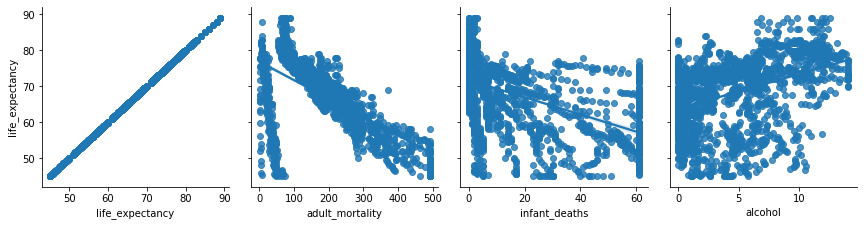

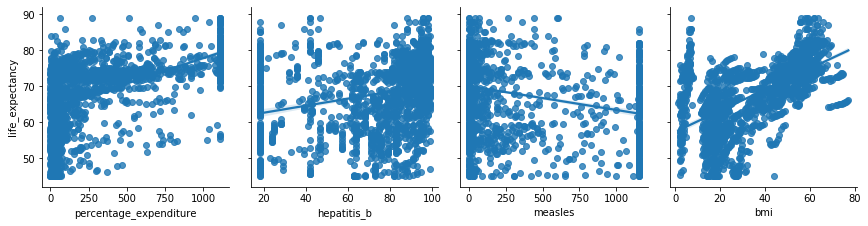

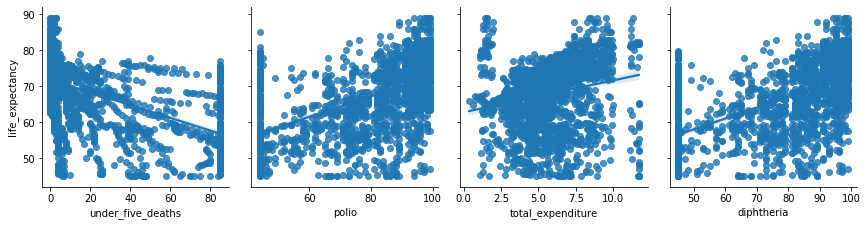

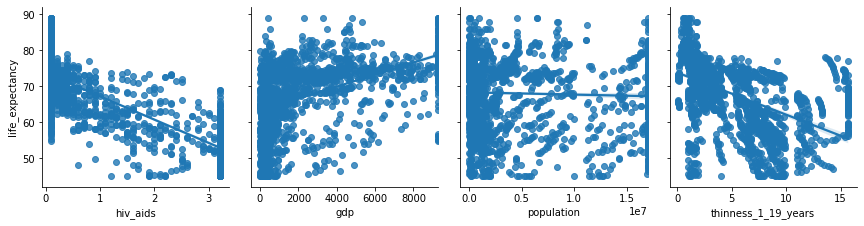

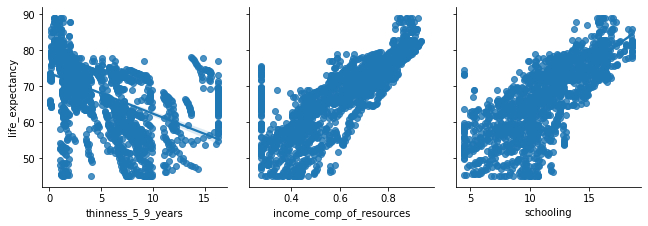

In [108]:
for i in row_groups:
    pp = sns.pairplot(data=df_w, y_vars=['life_expectancy'],x_vars=i, kind="reg", height=3,)

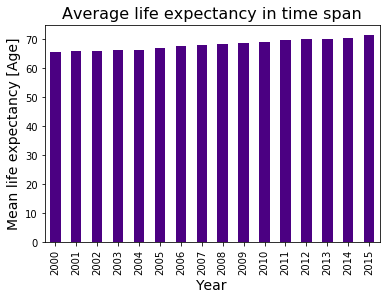

In [130]:
# Visualize avg life expectancy over time.

df_w.groupby('year').life_expectancy.mean().sort_values(ascending = True).plot(kind='bar',color='indigo')
plt.title('Average life expectancy in time span', fontsize=16)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Mean life expectancy [Age]',fontsize=14)
plt.savefig('lifeexp_v_years.png', dpi = 300)

## Statistical Tests & confidence Intervals.

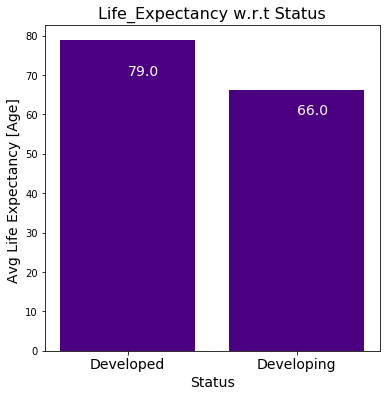

In [110]:
plt.figure(figsize=(6,6))
plt.bar(df_w.groupby('status')['status'].count().index,df_w.groupby('status')['life_expectancy'].mean(), color = 'indigo')
plt.xlabel("Status",fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel("Avg Life Expectancy [Age] ",fontsize=14)
plt.title("Life_Expectancy w.r.t Status",fontsize=16)
plt.text('Developed',70,str(round(df_w.groupby('status')['life_expectancy'].mean()[0])),color='w',fontsize=14)
plt.text('Developing',60,str(round(df_w.groupby('status')['life_expectancy'].mean()[1])),color='w',fontsize=14)
plt.savefig('life expectancy v status')
plt.show()

## Confidence intervals

In [111]:
# confidence intervals for life expectancy of developed nations
mu_developed = df_w.groupby('status')['life_expectancy'].mean()[0]

stdev = df_w[df_w.status == 'Developed'].life_expectancy.std()
confidence_interval = scs.norm.interval(alpha = 0.95,
                 loc = mu_developed,
                 scale = stdev)



print('We are 95% confident that the population life expectancy mean of developed nations in this survey ' + '\n' + 'is between: '+ str(confidence_interval))




We are 95% confident that the population life expectancy mean of developed nations in this survey 
is between: (70.63796024164012, 87.02519765309674)


In [112]:
## confidence intervals for life expectancy of developing nations.

mu_developing = df_w.groupby('status')['life_expectancy'].mean()[1]

stdev = df_w[df_w.status == 'Developing'].life_expectancy.std()
confidence_interval = scs.norm.interval(alpha = 0.95,
                 loc = mu_developed,
                 scale = stdev)



print('We are 95% confident that the population life expectancy mean of developed nations in this survey ' + '\n' + 'is between: '+ str(confidence_interval))



We are 95% confident that the population life expectancy mean of developed nations in this survey 
is between: (60.974086412874996, 96.68907148186186)


## Statistical Test: Two Sample t-test of means.

In [113]:
# Test the statistical significance of observed means: perform two sample t-test of means

#H_0: life expectancy mean for developed nations is equal to the life expectancy mean of developing nations.

#H_1: life expectancy mean for developed nations is not equal to the life expectancy mean of developing nations.

scs.ttest_ind(df_w.loc[df_w['status']=='Developed','life_expectancy'],df_w.loc[df_w['status']=='Developing','life_expectancy'])

Ttest_indResult(statistic=23.02232052151534, pvalue=3.793119218299665e-104)

**P-value << 0.05, hence the difference in avg life expectancy between developed and developing countries is significant
and indicates our observed difference between developed and developing countries is not due to random sampling error.**

## Feature Selection & Engineering

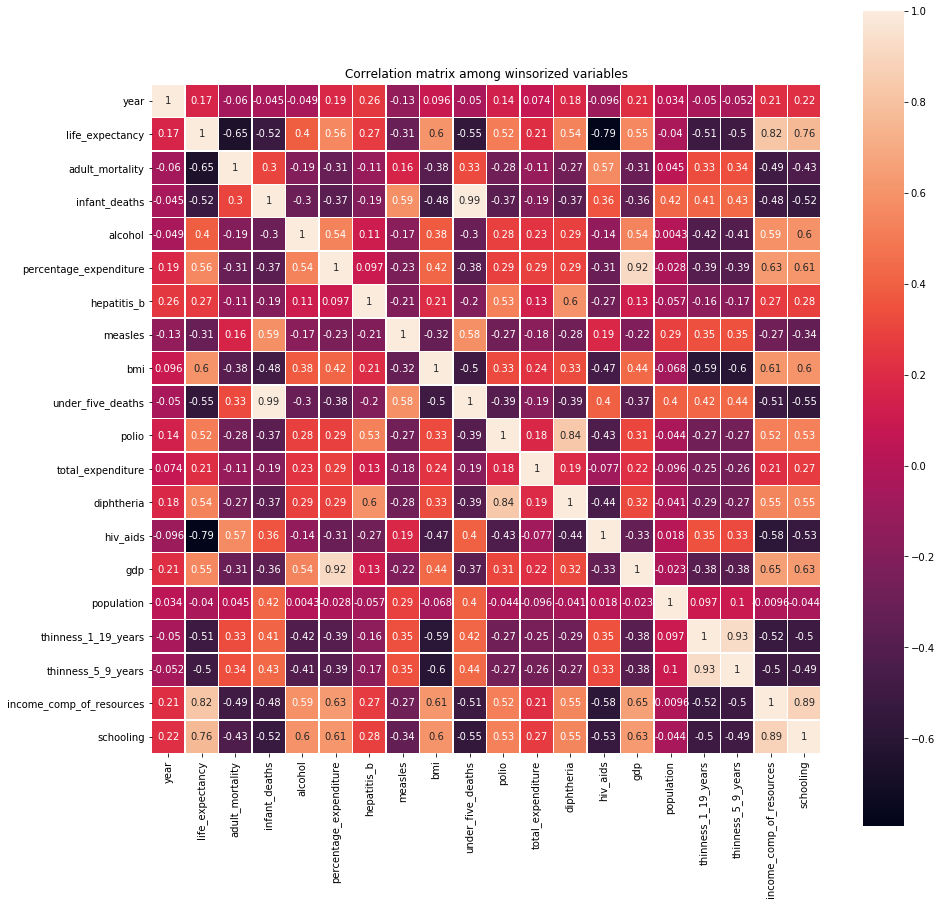

In [114]:
# Inspect correlation matrix for dropping of collinear features.

plt.figure(figsize=(15,15))
sns.heatmap(df_w.corr(), square=True, annot=True, linewidths=.5)
plt.title("Correlation matrix among winsorized variables")
plt.show()

Notes:
- income_comp_resources is correlated with schooling.
- both thinness variables are correlated.
- polio and diptheria are correlated.
- percentage expenditure are correlated.
- Life expectancy and income_comp are correlated.
- infant deaths and under_five_deaths are correlated.
- hiv_aids and life expectancy are negatively correlated
- adult mortality and life expectancy negatively correlated.

In [131]:
# Create dummy variables for developed/developing categories.

df_w = pd.concat([df_w, pd.get_dummies(df_w['status'])], 1)

In [132]:
# compile list of appropriate features.

features = ['life_expectancy','adult_mortality','alcohol','percentage_expenditure','hepatitis_b',
           'under_five_deaths','polio','total_expenditure','hiv_aids','population','thinness_1_9_years','schooling',
           'Developed','Developing']

In [134]:
# Create dataframe of selected model features and target.
df_feat = df_w[features]

In [135]:
# run final model

lr_f_model = ols(formula='life_expectancy~adult_mortality+alcohol+percentage_expenditure+hepatitis_b\
+under_five_deaths+polio+total_expenditure+hiv_aids+population+\
thinness_1_9_years+schooling+Developed+Developing', data=df_feat).fit()

In [136]:
lr_f_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     907.5
Date:                Fri, 31 Jul 2020   Prob (F-statistic):               0.00
Time:                        15:05:57   Log-Likelihood:                -5462.6
No. Observations:                1987   AIC:                         1.095e+04
Df Residuals:                    1974   BIC:                         1.102e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 41.5116      0.492     84.335      0.000      40.546      42.477
adult_mortality           -0.0150      0.001    -17.206      0.000      -0.017      -0.013
alcohol                   -0.0436      0.032     -1.342      0.180      -0.107       0.020
percentage_expenditure     0.0030      0.000      9.696      0.000       0.002       0.004
hepatitis_b               -0.0062      0.004     -1.629      0.103      -0.014       0.001
under_five_deaths         -0.0304      0.004     -7.664      0.000      -0.038      -0.023
polio                      0.0337      0.007      5.110      0.000       0.021       0.047
total_expenditure          0.0295      0.040      0.731      0.465      -0.050       0.109
hiv_aids                  -3.4150      0.102    -33.408      0.000      -3.616      -3.215
population              5.948e-08   1.55e-08      3.828      0.000     2.9e-08       9e-08
thinness_1_9_years        -0.1385      0.025     -5.541      0.000      -0.188      -0.089
schooling                  0.8225      0.049     16.703      0.000       0.726       0.919
Developed                 21.3676      0.331     64.551      0.000      20.718      22.017
Developing                20.1441      0.254     79.165      0.000      19.645      20.643
==============================================================================
Omnibus:                       56.272   Durbin-Watson:                   0.598
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.497
Skew:                          -0.189   Prob(JB):                     2.76e-24
Kurtosis:                       4.081   Cond. No.                     8.81e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.58e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

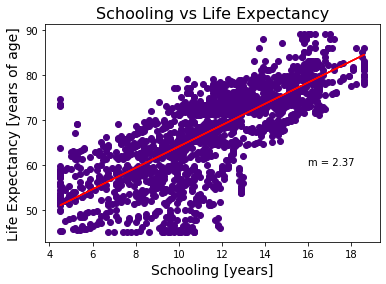

In [137]:
# Visualize the 3 features with the most impact on the target.

m,b = np.polyfit(df_w.schooling,df_w.life_expectancy,1)
plt.scatter(df_w.schooling,df_w.life_expectancy, color ='indigo')
plt.plot(df_w.schooling, m*df_w.schooling+b,color = 'red')
plt.title('Schooling vs Life Expectancy', fontsize=16)
plt.ylabel('Life Expectancy [years of age]',fontsize=14)
plt.xlabel('Schooling [years]',fontsize=14)
plt.text(16,60,'m = ' + str(round(m,2)))
plt.savefig('schooling_v_life_expectancy.png', dpi=300)


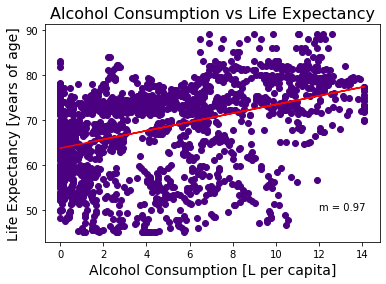

In [138]:
m1,b1 = np.polyfit(df_w.alcohol,df_w.life_expectancy,1)
plt.scatter(df_w.alcohol,df_w.life_expectancy, color ='indigo')
plt.plot(df_w.alcohol, m1*df_w.alcohol+b1,color = 'red')
plt.title('Alcohol Consumption vs Life Expectancy', fontsize=16)
plt.ylabel('Life Expectancy [years of age]',fontsize=14)
plt.xlabel('Alcohol Consumption [L per capita]',fontsize=14)
plt.text(12,50,'m = ' + str(round(m1,2)))
plt.savefig('alcohol_v_life_expectancy.png',dpi=300)

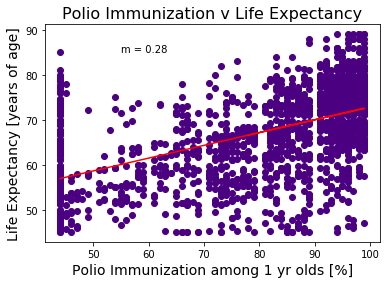

In [139]:
m3,b3 = np.polyfit(df_w.polio, df_w.life_expectancy,1)
plt.scatter(df_w.polio,df_w.life_expectancy, color ='indigo')
plt.plot(df_w.polio, m3*df_w.polio+b3,color = 'red')
plt.title('Polio Immunization v Life Expectancy', fontsize=16)
plt.ylabel('Life Expectancy [years of age]',fontsize=14)
plt.xlabel('Polio Immunization among 1 yr olds [%]',fontsize=14)
plt.text(55,85,'m = ' + str(round(m3,2)))
plt.savefig('polioimm_v_life_expectancy.png',dpi=300)